<a href="https://colab.research.google.com/github/anshshori2002/Machine-Learning-Projects/blob/master/Cats_vs_dogs_classfication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
#Above are the shell commands
#1. This line is a shell command that uses the mkdir command to create a directory named .kaggle in the user's home directory (~).
#2. command to copy a file named kaggle.json to the .kaggle directory in the user's home directory.

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:12<00:00, 155MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization, Dropout

In [ ]:
  #generators - Convert the data into batches
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size=(256,256)
)
#It is stored in the form of numpy array

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize values from 0-255 to 0-1
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 110s 148ms/step - loss: 0.5999 - accuracy: 0.6725 - val_loss: 0.5099 - val_accuracy: 0.7526
Epoch 2/10
625/625 [==============================] - 62s 98ms/step - loss: 0.4635 - accuracy: 0.7776 - val_loss: 0.4541 - val_accuracy: 0.7810
Epoch 3/10
625/625 [==============================] - 74s 118ms/step - loss: 0.3518 - accuracy: 0.8428 - val_loss: 0.4433 - val_accuracy: 0.7954
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2210 - accuracy: 0.9089 - val_loss: 0.5599 - val_accuracy: 0.7948
Epoch 5/10
625/625 [==============================] - 75s 119ms/step - loss: 0.1141 - accuracy: 0.9568 - val_loss: 0.7699 - val_accuracy: 0.7908
Epoch 6/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0833 - accuracy: 0.9710 - val_loss: 0.8442 - val_accuracy: 0.7792
Epoch 7/10
625/625 [==============================] - 58s 92ms/step - loss: 0.0524 - accuracy: 0.9825 - val_loss: 0.9722 - val_accu

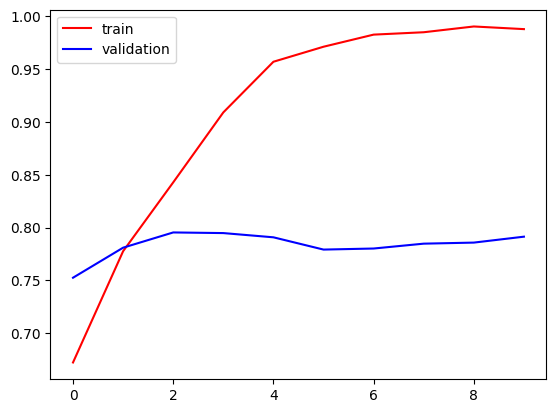

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


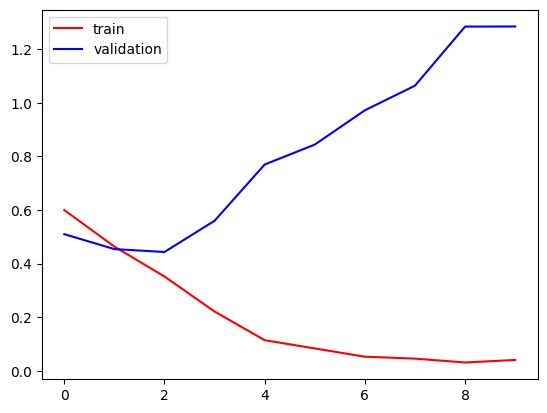

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Ways to reduce Overfitting
1. Add more data
2. Data Augmentation
3. L1/L2 Regularizer
4. Dropout
5. Batch Norm
6. Reduce Complexity